In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [3]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

In [118]:
np.expand_dims(gender, axis=1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

Use `least_squares` to compute w, and visualize the results.

(3, 1)


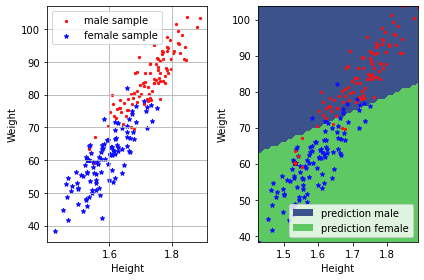

In [9]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w, _ = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [61]:
def sigmoid(t):    
    """ SIGMOID
        Apply the sigmoid function on t.

        INPUTS:
        t: an array or arbitrary size

        OUTPUTS:
        sig: the sigmoid of the array t
    """
    sig = np.exp(t) / (1 + np.exp(t))
    
    return sig

In [57]:
def calculate_loss(y, tx, w):    
    """ CALCULATE_LOSS
        negative log likelihood for logistic regression

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        loss: A scalar of the loss of the model applied on the dataset
    """
    loss = - np.squeeze(y.T @ (tx @ w)) + np.sum(np.log(1+np.exp(tx @ w)), axis=0)
    
    return loss

In [112]:
w = np.zeros((x.shape[1], 1))

print(x.shape)
print(y.shape)
print(w.shape)
calculate_loss(y,x,w)

(200, 2)
(200, 1)
(2, 1)


array([138.62943611])

In [108]:
def calculate_gradient(y, tx, w):    
    """ CALCULATE_GRADIENT
        compute the gradient of loss for logistic regression.

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        grad: The gradient of the loss
    """
    grad = tx.T @ (sigmoid(tx @ w) - y)
    
    return grad

In [110]:
w = np.zeros((x.shape[1], 1))

#print(w.shape)
#print(x.shape)
print(y.shape)
print(calculate_gradient(y,x,w))

(200, 1)
(200, 1)
[[68.74603697]
 [79.61302092]]


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [74]:
def learning_by_gradient_descent(y, tx, w, gamma):   
    """ LEARNING_BY_GRADIENT_DESCENT Gradient descent logistic regression
        Do one step of gradient descent using logistic regression.
        Return the loss and the updated w.

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model
        gamma: learning rate

        OUTPUTS:
        w: the optimal weights for the given system
        loss: The loss of the model
    """
    # compute loss
    loss = calculate_loss(y, tx, w)
    # compute gradient
    grad = calculate_gradient(y, tx, w)
    # update w by gradient descent
    w = w - gamma*grad
    
    return w, loss

Demo!

Current iteration=0, loss=[138.62943611]
Current iteration=100, loss=[43.46403231]
Current iteration=200, loss=[41.54589281]
Current iteration=300, loss=[41.09863897]
Current iteration=400, loss=[40.96487064]
Current iteration=500, loss=[40.92008946]
Current iteration=600, loss=[40.90418744]
Current iteration=700, loss=[40.89834995]
Current iteration=800, loss=[40.89616497]
Current iteration=900, loss=[40.89533753]
Current iteration=1000, loss=[40.89502196]
Current iteration=1100, loss=[40.89490109]
Current iteration=1200, loss=[40.89485466]
Current iteration=1300, loss=[40.8948368]
Current iteration=1400, loss=[40.89482992]
Current iteration=1500, loss=[40.89482727]
loss=[40.89482664]


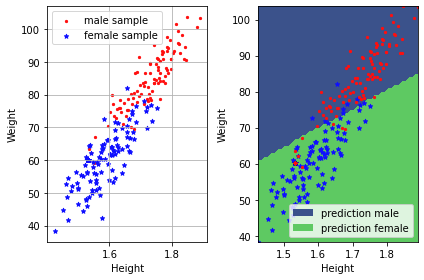

In [76]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        w, loss = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [102]:
def calculate_hessian(y, tx, w):   
    """ CALCULATE_HESSIAN
        return the Hessian of the loss function.

        INPUTS:
        y: an Nx1 array of the output variable
        tx: an Nxd array of the input variable
        w: a dx1 array of the model

        OUTPUTS:
        hessian: A scalar of the loss of the Hessian applied on the dataset
    """
    S = np.diag(sigmoid(tx @ w) @ (1 - sigmoid(tx @ w)).T)
    print(S.shape)
    hessian = (S @ tx)
    
    return hessian

In [103]:
w = np.zeros((x.shape[1], 1))

print(w.shape)
print(x.shape)
print(sigmoid(x @ w).T.shape)
print((1. - sigmoid(x @ w)).shape)
print(calculate_hessian(y,x,w))

(2, 1)
(200, 2)
(1, 200)
(200, 1)
(200,)
[-7.79376563e-14  7.69384556e-14]


Write a function below to return loss, gradient, and Hessian.

In [ ]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    raise NotImplementedError

### Using Newton's method
Use Newton's method for logistic regression.

In [ ]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and Hessian: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

demo

In [ ]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [ ]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

In [ ]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)